# Fig 1.07 Collins toggle switch

For Figures 1.7, 7.13, 7.14, 7.15

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
# Model
@parameters a1 a2 β γ
@variables t s1(t) s2(t) i1(t) i2(t)

D = Differential(t)

# Time-dependent inhibitor levels
i1_fun(t) = ifelse(30<= t <= 40, 10, 0)
i2_fun(t) = ifelse(10<= t <= 20, 10, 0)

@register i1_fun(t)
@register i2_fun(t)

In [4]:
@named collinsSys = ODESystem([ i1 ~ i1_fun(t),
                                i2 ~ i2_fun(t),
                                D(s1) ~ a1 * hill(1 + i2, s2, β) - s1,
                                D(s2) ~ a2 * hill(1 + i1, s1, γ) - s2])

Model collinsSys with 4 equations
States (4):
  s1(t)
  s2(t)
  i1(t)
  i2(t)
Parameters (4):
  a1
  β
  γ
  a2

In [5]:
collinsSys = structural_simplify(collinsSys)

Model collinsSys with 2 equations
States (2):
  s1(t)
  s2(t)
Parameters (4):
  a1
  β
  γ
  a2
Incidence matrix:
 ×  ⋅  ×  ×
 ⋅  ×  ×  ×

In [6]:
u0 = [s1 => 0.075, s2 => 2.5]
p = [a1 => 3.0, a2 => 2.5, β => 4.0, γ => 4.0]
tend = 50.0

50.0

In [7]:
prob = ODEProblem(collinsSys, u0, tend, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 2-element Vector{Float64}:
 0.075
 2.5

In [8]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 53-element Vector{Float64}:
  0.0
  0.38548049109061366
  1.278631277564115
  2.4645385197189382
  4.060892379366299
  6.199064132574178
  9.163105650034959
  9.798820341495249
  9.894588619176677
  9.94763452993227
  9.996299891284654
 10.237219446047664
 10.348380872712305
  ⋮
 34.06255357482209
 34.82275861930596
 35.641423755251424
 36.52445573893435
 37.49626221785786
 38.58250403197984
 39.82255354938077
 41.267051796515986
 43.536913870489045
 45.446592053215205
 48.51647803597581
 50.0
u: 53-element Vector{Vector{Float64}}:
 [0.075, 2.5]
 [0.07496310584167311, 2.4999747263084027]
 [0.07491895384380044, 2.499943104160486]
 [0.07489947360273834, 2.4999279757422332]
 [0.07489347508796303, 2.4999227222894476]
 [0.07489238103876021, 2.4999215657223286]
 [0.07489230549270372, 2.4999214349680408]
 [0.07489224496414892, 2.4999213970779373]
 [0.074892

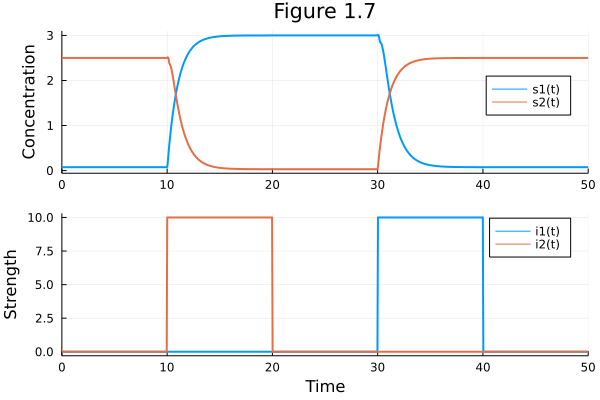

In [9]:
pl0107a = plot(sol, legend=:right, xlabel = "", ylabel="Concentration", title="Figure 1.7")

# Tracking intermediate variables
pl0107b = plot(sol, vars = [i1, i2], xlabel="Time", ylabel="Strength")

plot(pl0107a, pl0107b, layout=(2, 1))